# Interpreting the models

In [1]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.pylab as pl

import os

import helpers as h

# lets you make changes to external files, which are then automatically reload
%load_ext autoreload
%autoreload 2

C:\Users\shahj\AppData\Local\Temp\ipykernel_18756\3682993087.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load the model

This was originally written to load 3 separate models from the LightGBM method, which has now been adapted to load the single model from the Random Forest method.

That explains why I am loading a single model into a dictionary...

In [36]:
# load the models
from joblib import load
models = {}

# these parameters are used to find the model you want to load

ds_duration = 300 #15*60#180
ds_period = -1
model_type = 'LGB'
IBSorOBS = 'OBS'
opt = 'untuned'

# or just use a favourite model that has been saved separately
fav = False


# was RFE used? if so then need to load the extra _features.joblib file
rfe = True

if fav:
    # set the favourite model here
    folder = 'Y:/Heaters/Models/LGB/Favs/untuned 2/'
    HK_folder = folder 
else:
    folder = 'Y:\\Heaters\\Models\\LGB\\'
    HK_folder = 'HK data/'

if ds_period < 0:
    HP_TIME_BINS = h.get_var_time_bins(ds_duration)
else:
    HP_TIME_BINS = np.arange(0, ds_duration, ds_period)

# define the coordinate system to use
#spherical
components = ['|B|', 'phi', 'theta'] 


if model_type == 'RF' or model_type == 'MLP':
    
    models['all'] = load(folder + f"{IBSorOBS}_{opt}_{ds_period}_{ds_duration}.joblib")
    mapper = load(folder + f"{IBSorOBS}_{opt}_{ds_period}_{ds_duration}_scaler.joblib")
    if rfe:
        selected_features = load(folder + f"{IBSorOBS}_{opt}_{ds_period}_{ds_duration}_features.joblib")
else:
    

    for component in tqdm(components):
        models[component] = load(folder + f"{IBSorOBS}_{component}_{opt}_{ds_period}_{ds_duration}.joblib")
    mapper = load(folder + f"{IBSorOBS}_{opt}_{ds_period}_{ds_duration}_scaler.joblib")
    if rfe:
        selected_features = load(folder + f"{IBSorOBS}_{component}_{opt}_{ds_period}_{ds_duration}_features.joblib")


  0%|          | 0/3 [00:00<?, ?it/s]

OSError: [Errno 22] Invalid argument: 'Y:\\Heaters\\Models\\LGB\\OBS_|B|_untuned_-1_300.joblib'

In [27]:
# load the models
from joblib import load


# these parameters are used to find the model you want to load

ds_duration = 300 #15*60#180
ds_period = -1
model_type = 'LGB'
IBSorOBS = 'OBS'
opt = 'untuned'
rfe = False

folder = 'Y:\\Heaters\\Models\\LGB\\'
HK_folder = 'HK data/'

if ds_period < 0:
    HP_TIME_BINS = h.get_var_time_bins(ds_duration)
else:
    HP_TIME_BINS = np.arange(0, ds_duration, ds_period)

# define the coordinate system to use
#spherical
from tqdm import tqdm

components = ['B', 'phi', 'theta'] 
components1 = ['|B|', 'phi', 'theta'] 
models = {}

for idx, component in enumerate(tqdm(components)):
    models[component1] = load(folder + f"{IBSorOBS}_{components[idx]}_{opt}_{ds_period}_{ds_duration}.joblib")
    
mapper = load(folder + f"{IBSorOBS}_{opt}_{ds_period}_{ds_duration}_scaler.joblib")
if rfe:
    selected_features = load(folder + f"{IBSorOBS}_{component}_{opt}_{ds_period}_{ds_duration}_features.joblib")

  0%|          | 0/3 [00:00<?, ?it/s]


NameError: name 'component1' is not defined

# Load the features

In [3]:
features = pd.read_csv(HK_folder + "features.csv", parse_dates = ['Date'])
features

,Date,Radius,time_since_T_high,time_it_was_high,cumulative,OBS T,IBS T,OBS minus IBS T,dutycycle,SCM T,...,SCM T -1,SCM T -2,SCM T -3,SCM T -4,SCM T 1,SCM T grad -1,SCM T grad -2,SCM T grad -3,SCM T grad -4,SCM T grad 1
0,2021-11-09,81,4,0,0,1,1,11,4,7,...,7.0,7.0,7.0,8.0,7.0,11.0,11.0,11.0,11.0,11.0
1,2021-11-10,82,5,0,0,1,1,11,4,7,...,7.0,7.0,7.0,7.0,7.0,11.0,11.0,11.0,11.0,12.0
2,2021-11-11,83,6,0,0,1,1,11,4,7,...,7.0,7.0,7.0,7.0,7.0,11.0,11.0,11.0,11.0,14.0
3,2021-11-12,83,7,0,0,1,1,10,4,7,...,7.0,7.0,7.0,7.0,9.0,12.0,11.0,11.0,11.0,13.0
4,2021-11-13,84,8,0,0,1,1,10,3,9,...,7.0,7.0,7.0,7.0,10.0,14.0,12.0,11.0,11.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2023-05-17,56,0,13,13,1,2,9,16,5,...,6.0,6.0,6.0,7.0,4.0,11.0,12.0,11.0,1.0,11.0
555,2023-05-18,57,1,13,12,1,1,9,5,4,...,5.0,6.0,6.0,6.0,5.0,10.0,11.0,12.0,11.0,12.0
556,2023-05-19,58,2,13,11,1,1,9,5,5,...,4.0,5.0,6.0,6.0,5.0,11.0,10.0,11.0,12.0,11.0
557,2023-05-20,60,3,13,10,1,2,9,5,5,...,5.0,4.0,5.0,6.0,4.0,12.0,11.0,10.0,11.0,11.0


## Remove bad dates

In [4]:
ranges = pd.read_csv("bad_dates.csv", parse_dates=['start', 'end'])

bad_dates = h.get_forbidden_dates(ranges)

wb_features = features[~features['Date'].isin(bad_dates)]
bad_features = features[features['Date'].isin(bad_dates)]

## Turn into sklearn format

This just stacks all the selected profiles together. This has to be done here since it depends on the `ds_period` and `ds_duration` that the model was trained on. We can't just save what the model was trainined on since we now need to load data it has never seen before (like perihelion times)

In [19]:
# just use features for now, I want to see on everything
all_data = h.in_sklearn_format(features, ds_duration, ds_period, IBSorOBS, test = True)
B, phi, theta = h.cart2sph(
    all_data['R'].values,
    all_data['T'].values,
    all_data['N'].values,
)
all_data['|B|'] = B
all_data['phi'] = phi
all_data['theta'] = theta

all_data

KeyboardInterrupt: 

scale the data using the saved mapper

In [20]:
all_data_scaled = mapper.transform(all_data)

In [21]:
all_data

,R,T,N,hp_id,Time,Radius,time_since_T_high,time_it_was_high,cumulative,OBS T,...,SCM T -4,SCM T 1,SCM T grad -1,SCM T grad -2,SCM T grad -3,SCM T grad -4,SCM T grad 1,|B|,phi,theta
0,0.048344,0.038918,0.024197,0,-0.75,81,4,0,0,1,...,8.0,7.0,11.0,11.0,11.0,11.0,11.0,0.066612,38.834618,21.299960
1,0.052676,0.136172,0.097143,0,-0.25,81,4,0,0,1,...,8.0,7.0,11.0,11.0,11.0,11.0,11.0,0.175369,68.851852,33.637563
2,0.063314,0.207208,0.148339,0,0.25,81,4,0,0,1,...,8.0,7.0,11.0,11.0,11.0,11.0,11.0,0.262580,73.009094,34.397349
3,0.065921,0.265715,0.194093,0,0.75,81,4,0,0,1,...,8.0,7.0,11.0,11.0,11.0,11.0,11.0,0.335592,76.066828,35.335234
4,0.069520,0.313902,0.230390,0,1.25,81,4,0,0,1,...,8.0,7.0,11.0,11.0,11.0,11.0,11.0,0.395534,77.512240,35.625013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105700,0.028291,0.073409,0.118336,558,262.50,61,4,13,9,1,...,5.0,4.0,11.0,12.0,11.0,10.0,11.0,0.142101,68.923716,56.383239
105701,0.020279,0.071299,0.127430,558,267.50,61,4,13,9,1,...,5.0,4.0,11.0,12.0,11.0,10.0,11.0,0.147421,74.123238,59.813139
105702,0.009319,0.068348,0.130182,558,272.50,61,4,13,9,1,...,5.0,4.0,11.0,12.0,11.0,10.0,11.0,0.147328,82.235592,62.081821
105703,0.002540,0.060330,0.130815,558,277.50,61,4,13,9,1,...,5.0,4.0,11.0,12.0,11.0,10.0,11.0,0.144079,87.589505,65.222430


drop the profiles to create the stacked features to make predictions from

In [17]:
# make predictions
to_drop = ["hp_id", 'R', 'T', 'N', '|B|', 'phi', 'theta']
for key in all_data_scaled.keys():
    if "_orig" in key or "pred" in key:
        to_drop.append(key)
    all_x = all_data_scaled.drop(to_drop,axis = 1)


,Time,Radius,time_since_T_high,time_it_was_high,cumulative,OBS T,IBS T,OBS minus IBS T,dutycycle,SCM T,...,SCM T -1,SCM T -2,SCM T -3,SCM T -4,SCM T 1,SCM T grad -1,SCM T grad -2,SCM T grad -3,SCM T grad -4,SCM T grad 1
0,-1.029046,-0.250000,-0.315789,-0.070175,-0.090909,0.0,0.000000,0.5,-0.090909,0.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.020747,-0.250000,-0.315789,-0.070175,-0.090909,0.0,0.000000,0.5,-0.090909,0.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.012448,-0.250000,-0.315789,-0.070175,-0.090909,0.0,0.000000,0.5,-0.090909,0.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.004149,-0.250000,-0.315789,-0.070175,-0.090909,0.0,0.000000,0.5,-0.090909,0.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.995851,-0.250000,-0.315789,-0.070175,-0.090909,0.0,0.000000,0.5,-0.090909,0.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105700,3.340249,-1.083333,-0.315789,0.385965,0.318182,0.0,0.142857,-0.5,0.000000,-1.5,...,-1.0,-1.0,-1.5,-1.0,-1.5,0.0,1.0,0.0,-1.0,0.0
105701,3.423237,-1.083333,-0.315789,0.385965,0.318182,0.0,0.142857,-0.5,0.000000,-1.5,...,-1.0,-1.0,-1.5,-1.0,-1.5,0.0,1.0,0.0,-1.0,0.0
105702,3.506224,-1.083333,-0.315789,0.385965,0.318182,0.0,0.142857,-0.5,0.000000,-1.5,...,-1.0,-1.0,-1.5,-1.0,-1.5,0.0,1.0,0.0,-1.0,0.0
105703,3.589212,-1.083333,-0.315789,0.385965,0.318182,0.0,0.142857,-0.5,0.000000,-1.5,...,-1.0,-1.0,-1.5,-1.0,-1.5,0.0,1.0,0.0,-1.0,0.0


# Comparing predictions

This cell makes the predictions. If the model type was 'RF' or 'MLP' then there is only one model, whereas LightGBM needs to use 2 separate models

In [24]:


if model_type == 'RF' or model_type == 'MLP':
    if rfe:
        # if RFE then only select those columns
        # doing this here becaues the mapper includes all the columns
        all_x = all_x.loc[:, selected_features]
    
    y_pred = models['all'].predict(all_x)
    
    for i in range(len(components)):
        index = mapper.transformed_names_.index(components[i])
        scaler = mapper.built_features[index][1]
        
        all_data_scaled[f'{components[i]}_pred'] = y_pred[:,i]
        all_data_scaled[f'{components[i]}_pred_orig'] = scaler.inverse_transform(y_pred[:,i].reshape(-1,1)).flatten()
        
else:
    # set the component you want to look at with LightGBM
    component = '|B|'
    if rfe:
        all_x = all_x.loc[:, selected_features]

    y_pred = models['component'].predict(all_x)

    index = mapper.transformed_names_.index(component)
    scaler = mapper.built_features[index][1]

    all_data_scaled['pred'] = y_pred 
    all_data_scaled['pred_orig'] = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

# unscale the original components
for i in range(len(components)):
    index = mapper.transformed_names_.index(components[i])
    scaler = mapper.built_features[index][1]
    all_data_scaled[components[i]+'_orig'] = scaler.inverse_transform(all_data_scaled[components[i]].values.reshape(-1,1)).flatten()

ValueError: 'B' is not in list

Work out the |B| for the predicted data. A good test of the predictions

In [23]:
# try to see if it got |B| right
all_data_scaled['|B|_orig'] = np.sqrt(all_data_scaled['R_orig']**2 + all_data_scaled['T_orig']**2 + all_data_scaled['N_orig']**2)
all_data_scaled['|B|_pred_orig'] = np.sqrt(all_data_scaled['R_pred_orig']**2 + all_data_scaled['T_pred_orig']**2 + all_data_scaled['N_pred_orig']**2)

KeyError: 'R_orig'

## Time

plot the predictions next to the real data all stacked in time

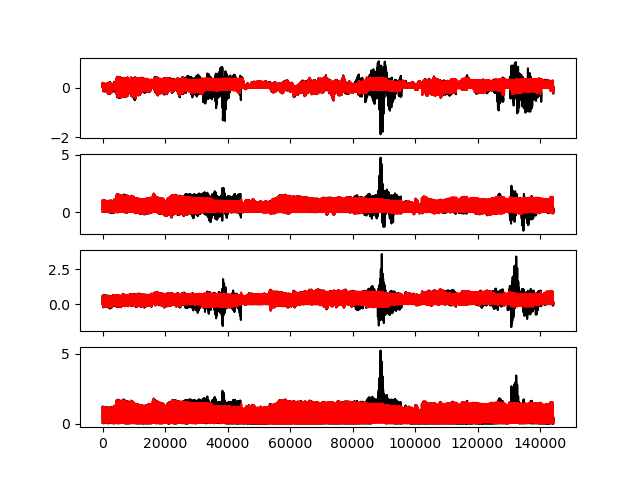

In [ ]:
%matplotlib ipympl

if model_type == 'RF'  or model_type == 'MLP':
    fig, axs = plt.subplots(4,1, sharex=True)

    axs[0].plot(all_data_scaled['R_orig'], color = 'black')
    axs[0].plot(all_data_scaled['R_pred_orig'], color = 'red')
    
    axs[1].plot(all_data_scaled['T_orig'], color = 'black')
    axs[1].plot(all_data_scaled['T_pred_orig'], color = 'red')
    
    axs[2].plot(all_data_scaled['N_orig'], color = 'black')
    axs[2].plot(all_data_scaled['N_pred_orig'], color = 'red')
    
    axs[3].plot(all_data_scaled['|B|_orig'], color = 'black')
    axs[3].plot(all_data_scaled['|B|_pred_orig'], color = 'red')


# Stacked histogram

In [ ]:
# build 2d arrays
N = features.shape[0]

component = 'N'

real_2d = np.ones((len(HP_TIME_BINS), N))*np.nan
pred_2d = np.ones((len(HP_TIME_BINS), N))*np.nan

# I also need to save the train idc from HPC
# for now just plot everything

for i in tqdm(features.index):
    selected_day = all_data_scaled.loc[all_data_scaled['hp_id'] == i]

    if i not in bad_features.index:
        # if too short then pad with np.nan
        if selected_day.shape[0] < len(HP_TIME_BINS):
            real_2d[:selected_day.shape[0], i] = selected_day[component+'_orig'].values
        else:
            real_2d[:, i] = selected_day[component+'_orig'].values
    else:
        # print(bad_features.loc[i, 'Date'])
        # this is a bad time, so don't show the profile
        real_2d[:, i] = np.nan
            
    # just fill in all the predictions
    if selected_day.shape[0] < len(HP_TIME_BINS):
        pred_2d[:selected_day.shape[0], i] = selected_day[component+'_pred_orig'].values
    else:
        pred_2d[:, i] = selected_day[component+'_pred_orig'].values

# for i in tqdm(features.index):
#     selected_day = all_data_scaled.loc[all_data_scaled['hp_id'] == i]
    
#     # if too short then pad with np.nan
#     if selected_day.shape[0] < len(HP_TIME_BINS):
#         real_2d[:selected_day.shape[0], i] = selected_day[component+'_orig'].values
#     else:
#         real_2d[:, i] = selected_day[component+'_orig'].values
            
#     # just fill in all the predictions
#     if selected_day.shape[0] < len(HP_TIME_BINS):
#         pred_2d[:selected_day.shape[0], i] = selected_day['pred_orig'].values
#     else:
#         pred_2d[:, i] = selected_day['pred_orig'].values

100%|██████████| 559/559 [00:00<00:00, 2718.96it/s]


/rds/general/ephemeral/user/rl4215/ephemeral/ipykernel_1633485/2564043929.py:56: RuntimeWarning: All-NaN slice encountered
  cb = ax0.pcolormesh(features['Date'], HP_TIME_BINS,  real_2d/np.nanmax(abs(real_2d), axis = 0), cmap = cmap, vmax = 1, vmin = -1)


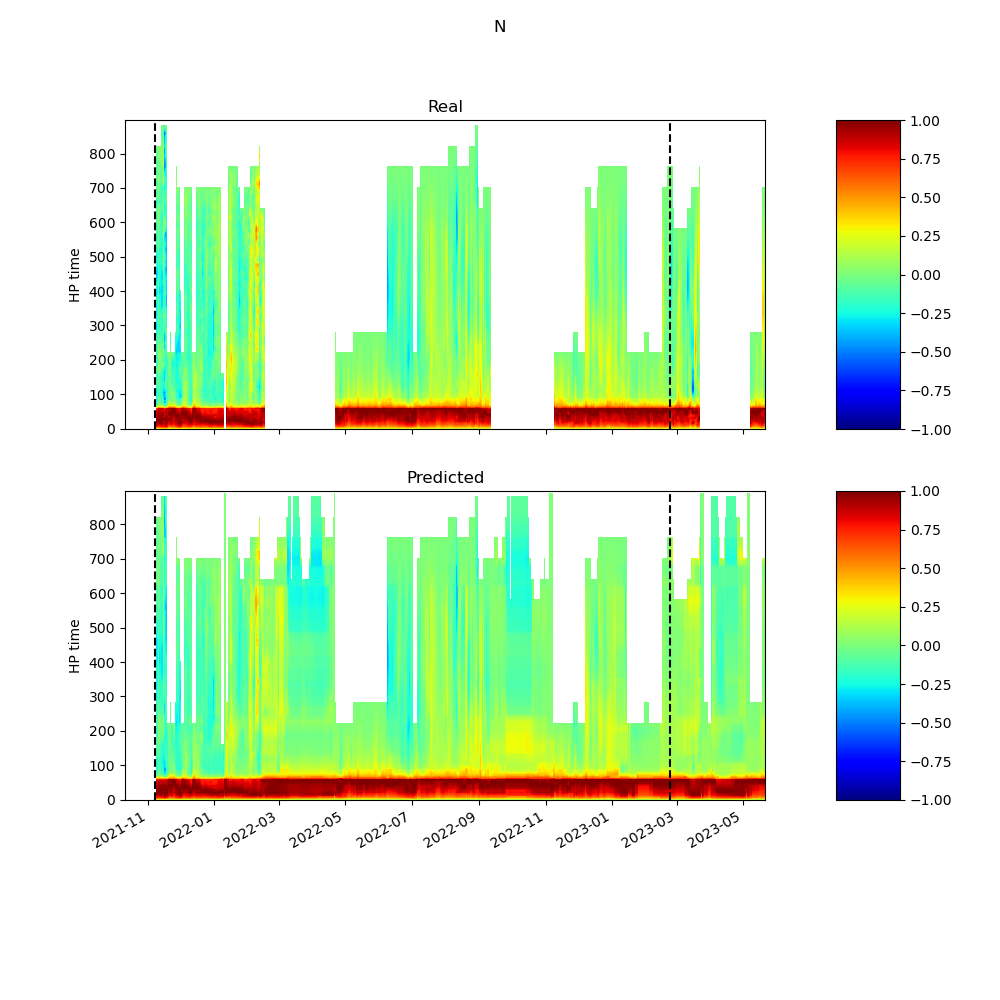

In [ ]:
%matplotlib ipympl
fig = plt.figure(figsize=(10, 10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2, width_ratios = [10,1])
# Create the Axes.
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0], sharex=ax0, sharey=ax0)
cax0 = fig.add_subplot(gs[0, 1])
cax1 = fig.add_subplot(gs[1, 1])


cmap = 'jet'

if component in ['R', 'T', 'N']:
    vmax = 1
    vmin = -1

if component == 'phi':
    vmax = 180
    vmin = -180

elif component == 'theta':
    vmax = 90
    vmin = -90

elif component == '|B|':
    vmax = 2
    vmin = 0

if cmap == 'seismic':
    # normalise horizontally
    # vmax = np.nanmax(real_2d)
    # vmin = np.nanmin(real_2d)
    # ax0.pcolormesh(features['Date'], HP_TIME_BINS,  real_2d/np.nanmax(abs(real_2d), axis = 0), cmap = cmap, vmax = vmax, vmin = vmin)
    # ax1.pcolormesh(features['Date'], HP_TIME_BINS,  pred_2d/np.nanmax(abs(real_2d), axis = 0), cmap = cmap, vmax = vmax, vmin = vmin)
    # normalise by max value in each heater profile
    cb = ax0.pcolormesh(features['Date'], HP_TIME_BINS,  real_2d, cmap = 'seismic', vmax = 1.5, vmin = -1.5)
    plt.colorbar(cb, cax = cax0)

    cb = ax1.pcolormesh(features['Date'], HP_TIME_BINS,  pred_2d, cmap = 'seismic', vmax = 1.5, vmin = -1.5)
    plt.colorbar(cb, cax = cax1)
    
if cmap == 'diff':

    cb = ax0.pcolormesh(features['Date'], HP_TIME_BINS,  real_2d, cmap = 'jet', vmax = 1, vmin = -1)
    plt.colorbar(cb, cax = cax0)

    cb = ax1.pcolormesh(features['Date'], HP_TIME_BINS,  real_2d - pred_2d, cmap = 'seismic', vmax = 1.5, vmin = -1.5)
    plt.colorbar(cb, cax = cax1)

elif cmap == 'jet':
    # normalise by max value in each heater profile
    if 'R' in components:
        cb = ax0.pcolormesh(features['Date'], HP_TIME_BINS,  real_2d/np.nanmax(abs(real_2d), axis = 0), cmap = cmap, vmax = 1, vmin = -1)
    else:
        cb = ax0.pcolormesh(features['Date'], HP_TIME_BINS,  real_2d, cmap = cmap, vmax = vmax, vmin = vmin)
    plt.colorbar(cb, cax = cax0)

    if 'R' in components:
        cb = ax1.pcolormesh(features['Date'], HP_TIME_BINS,  pred_2d/np.nanmax(abs(pred_2d), axis = 0), cmap = cmap, vmax = 1, vmin = -1)
    else:
        cb = ax1.pcolormesh(features['Date'], HP_TIME_BINS,  pred_2d, cmap = cmap, vmax = vmax, vmin = vmin)
    plt.colorbar(cb, cax = cax1)


for ax in [ax0, ax1]:
    # ax.axvline(datetime(2022,12,31), color = 'black', ls = '--')
    
    ax.axvline(datetime(2023,2,23), color = 'black', ls = '--')
    
    ax.axvline(datetime(2021,11,8), color = 'black', ls = '--')

ax0.set_title('Real')
ax1.set_title('Predicted')
ax0.set_ylabel('HP time')
ax1.set_ylabel('HP time')


fig.suptitle(component)

fig.autofmt_xdate()

# Example profiles in time

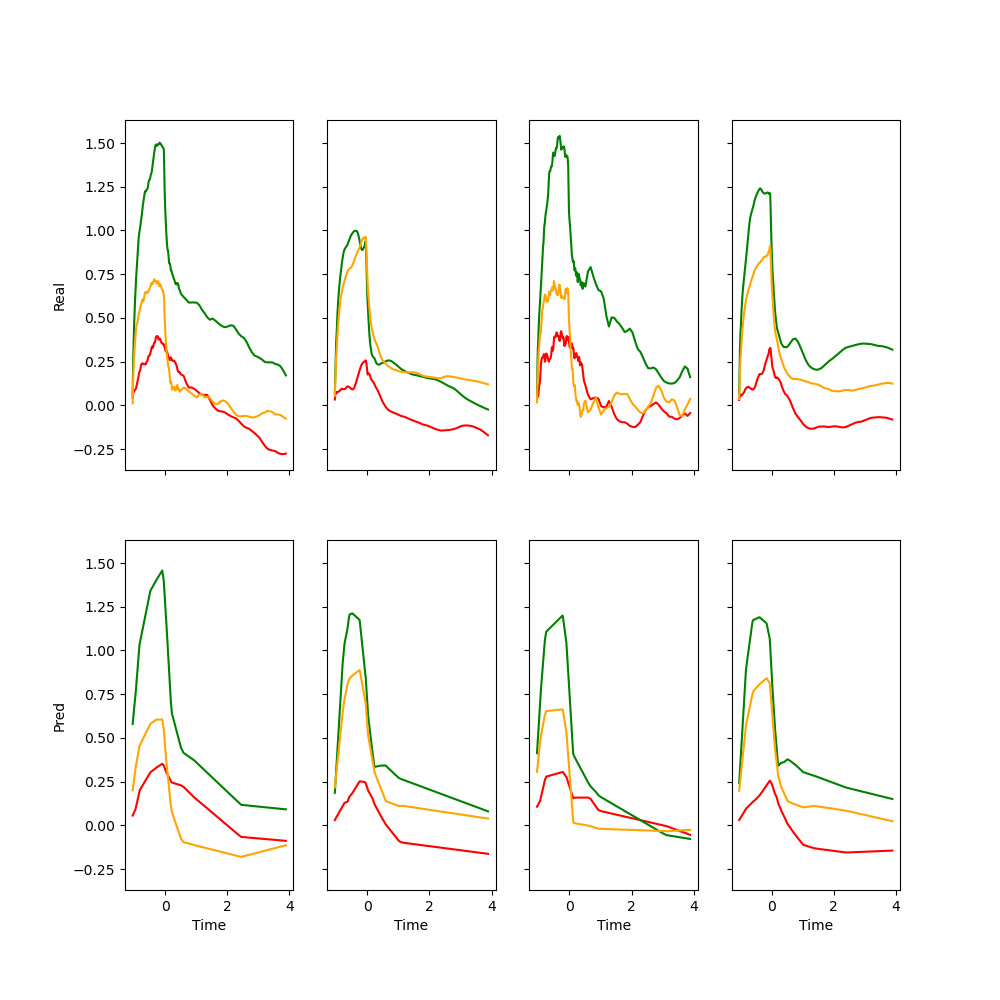

In [ ]:
columns = 4

fig, axs = plt.subplots(2, columns,sharex=True, sharey=True, figsize = (10,10))

idx = 0

component = 'T'
colors = ['red', 'green', 'orange']
# change to bad_features to test on unseen features that are defo wrong
# dates_to_plot = bad_features.sample(n = rows*columns, random_state = 1)

# sample from just test days
unseen_features = features.loc[(features['Date'] < datetime(2023,1,1))]
dates_to_plot = unseen_features.sample(n = 2*columns)



for column in np.arange(0, columns):
    selected_day = all_data_scaled.loc[all_data_scaled['hp_id'] == dates_to_plot.index[idx]]
    
    for i in range(len(components)):
        
        axs[0][column].plot(selected_day['Time'], selected_day[components[i]+'_orig'].values, color = colors[i])
        
        axs[1][column].plot(selected_day['Time'], selected_day[components[i]+'_pred_orig'].values, color = colors[i])
    
    idx +=1


axs[0][0].set_ylabel('Real')
axs[1][0].set_ylabel('Pred')

for column in np.arange(columns):
    axs[-1][column].set_xlabel("Time")

# Bayes

This section looks at the outcome of the BayesSearchCV optimiser. You can see how each hyperparameter was tuned

In [ ]:
if opt == 'bayes':
    from skopt.plots import plot_objective
    _ = plot_objective(models['N'].optimizer_results_[0])
    plt.show()

In [ ]:
models['N'].best_estimator_

AttributeError: 'LGBMRegressor' object has no attribute 'best_estimator_'

In [ ]:
if opt == 'bayes':
    print(models['N'].best_estimator_)

In [ ]:
if opt == 'bayes':
    plt.figure()

    plt.scatter(models['T'].cv_results_['rank_test_score'], models['T'].cv_results_['param_max_depth'])

## SHAP

This section uses shapley values from the [SHAP package](https://shap.readthedocs.io/en/latest/index.html)

This can take any model and work out how each feature affects the outcome. 

BEWARE that this can freeze your computer if run on a lot of data

In [ ]:
component = 'T'

dates = h.get_dates(datetime(2021,10,15), datetime(2021,11,30))

dfs = []

for date in dates:
    date_str = date.strftime("%Y-%m-%d")
    selected = features.loc[features['Date'] == date_str]
    test_profile = all_data.loc[all_data['hp_id'] == selected.index.values[0]].copy()
    test_profile.drop(["hp_id", 'R', 'T', 'N'],axis = 1, inplace=True)
    
    dfs.append(test_profile)
    
test_X = pd.concat(dfs)
test_X.reset_index(drop=True, inplace=True)
if 'pred' in test_X.keys():
    test_X.drop(columns=['pred'], inplace = True)

In [ ]:
import shap
shap.initjs()
if opt == 'bayes':
    explainer = shap.TreeExplainer(models[component].best_estimator_)
else:
    explainer = shap.TreeExplainer(models[component])
shap_values = explainer.shap_values(test_X)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0,:], test_X.iloc[0,:])

In [ ]:
shap.dependence_plot("Time", shap_values, test_X)

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, test_X)

# Looking at a few days

In [ ]:
component = 'T'

dates = h.get_dates(datetime(2022,6,2), datetime(2022,6,10))

dfs = []

for date in dates:
    date_str = date.strftime("%Y-%m-%d")
    selected = features.loc[features['Date'] == date_str]
    test_profile = all_data.loc[all_data['hp_id'] == selected.index.values[0]].copy()
    test_profile.drop(["hp_id", 'R', 'T', 'N'],axis = 1, inplace=True)
    
    dfs.append(test_profile)
    
test_X = pd.concat(dfs)
test_X.reset_index(drop=True, inplace=True)
if 'pred' in test_X.keys():
    test_X.drop(columns=['pred'], inplace = True)

In [ ]:
import shap
shap.initjs()
if opt == 'bayes':
    explainer = shap.TreeExplainer(models[component].best_estimator_)
else:
    explainer = shap.TreeExplainer(models[component])
shap_values = explainer.shap_values(test_X)

Work out how to do this myself so I don't have to run this slow code.

I want to plot impact of one parameter against time

## Careful, this is very slow

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[::2,:], test_X.iloc[::2,:])